### import des librairies de base

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import ipywidgets as widgets
from ipywidgets import interactive, VBox, Button
from IPython.display import display

### Modèle de croissance exponentielle, sans contrainte et avec taux de croissance constante
Le modèle se présente comme suit : $$\frac{dN(t)}{dt} = r*N(t) $$
Dont la solution est : $$ N(t) = N_{0}e^{rt}$$
où $N_0$ est la population initial

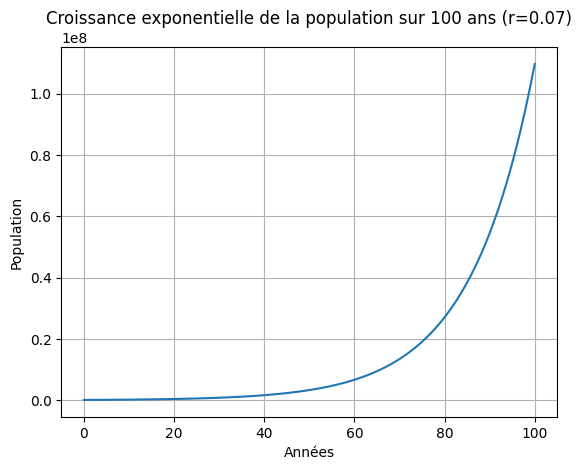

In [10]:
# Modelisation
## Parameters
n_0 = 100000 # initial population
r = 0.07 #growth rate, pour un pays africain ou d'asie du sud est(ou ouest)
### On suppose que dt est de l'ordre de le l'année
## On suppose que la simulation se passe sur un  100 ans.
T = np.linspace(0, 100, 100)

## L'evolution de la population :
N = n_0*np.exp(r*T)

# Création d'une nouvelle figure
plt.figure()

# Tracé des résultats
plt.plot(T, N, label='Population')
plt.xlabel('Années')
plt.ylabel('Population')
plt.title(f'Croissance exponentielle de la population sur {round(np.max(T))} ans (r={r})')
plt.grid(True)  # Ajout de la grille
plt.show()

### Modèle de croissance exponentielle, sans contrainte et avec taux de croissance variable
Le modèle se présente comme suit : $$\frac{dN(t)}{dt} = r(t)*N(t) $$
Dont la solution est : $$ N(t) = N_{0}e^{r(t)t}$$
où $N_0$ est la population initial.

Pour simuler la variation du taux de croissance de la population, on va utiliser, dans un premier temps, une fonction sigmoidale ou logistique.
Une fonction sigmoïdale ou logistique a cette forme générale :


$$ r(t) = \frac{K}{1 + e^{-a(t - t_0)}} $$

Où :

- $K$ est le taux de croissance maximal (au milieu de la période),
- $a$ contrôle la vitesse à laquelle la croissance s'accélère,
- $t_0$ détermine le point où la croissance est la plus rapide.

Cela nous permettra d'avoir une croissance lente au début, une accélération rapide au milieu, et une stabilisation vers la fin.

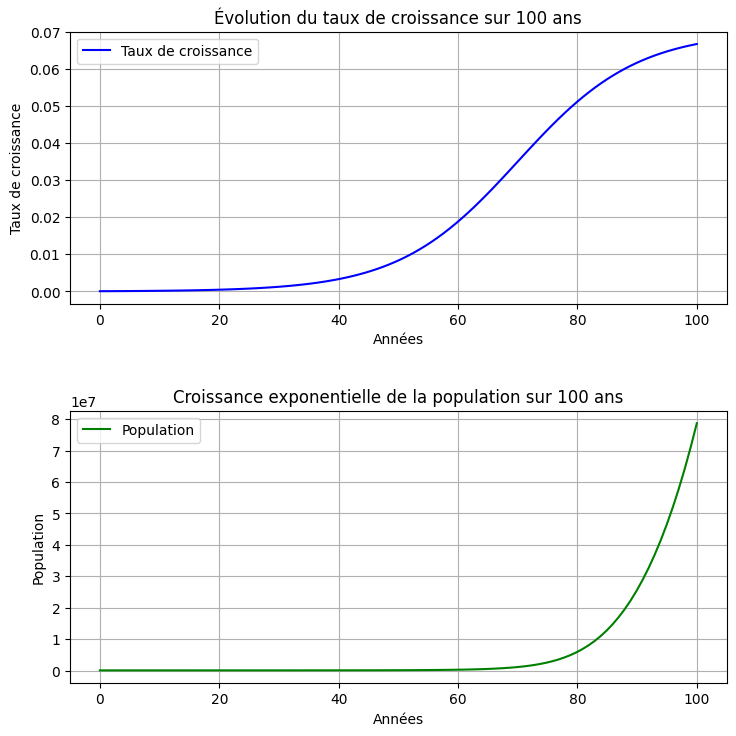

In [9]:
# Modélisation de la croissance démographique

## Paramètres
n_0 = 100000  # Population initiale
K = 0.07  # Taux de croissance maximal, adapté pour un pays africain ou d'Asie du Sud-Est (ou Ouest)
T_0 = 70  # L'année où la croissance est la plus rapide
a = 0.1  # Vitesse à laquelle la croissance s'accélère
### On suppose que dt est de l'ordre de l'année

## Simulation sur 100 ans
T = np.linspace(0, 100, 100)  # Temps simulé sur 100 ans

## Fonction du taux de croissance :
r = K / (1 + np.exp(-a * (T - T_0)))

## Évolution de la population :
N = n_0 * np.exp(r * T)

# Création d'une nouvelle figure avec des sous-graphiques
fig, axs = plt.subplots(2, figsize=(8, 8))  # Ajustement de la taille de la figure

# Tracé du taux de croissance
axs[0].plot(T, r, label="Taux de croissance", color='blue')
axs[0].set_title(f'Évolution du taux de croissance sur {round(np.max(T))} ans')
axs[0].set_xlabel('Années')
axs[0].set_ylabel('Taux de croissance')
axs[0].grid(True)
axs[0].legend()

# Tracé de la population
axs[1].plot(T, N, label="Population", color='green')
axs[1].set_title(f'Croissance exponentielle de la population sur {round(np.max(T))} ans')
axs[1].set_xlabel('Années')
axs[1].set_ylabel('Population')
axs[1].grid(True)
axs[1].legend()

# Ajustement de l'espace entre les sous-graphiques
fig.tight_layout(pad=3.0)

# Affichage du graphique
plt.show()

### Autres fonction pour simuler l'evolution du taux de croissance

Cette fois, nous cherchons a simuler un taux de croissance qui : 
- Croît lentement au début,
- Explose au milieu,
- Décroît à la fin.

On pourrait modéliser cela avec  **la fonction gaussienne (ou densité normale)**. Cette fonction a la forme générale :


$$ f(t) = A \cdot e^{-\left( \frac{t - t_0}{b} \right)^2} $$

Où :
- $A$ contrôle l'amplitude maximale (à quel point la fonction "explose" au milieu),
- $t_0$ est le point où la fonction atteint son maximum,
- $b$ contrôle la largeur de la cloche (si $b$ est petit, la courbe est plus étroite, si \( b \) est grand, la courbe est plus large).

Cette fonction commence lentement, atteint un maximum au milieu (autour de $t_0$), puis redescend rapidement.

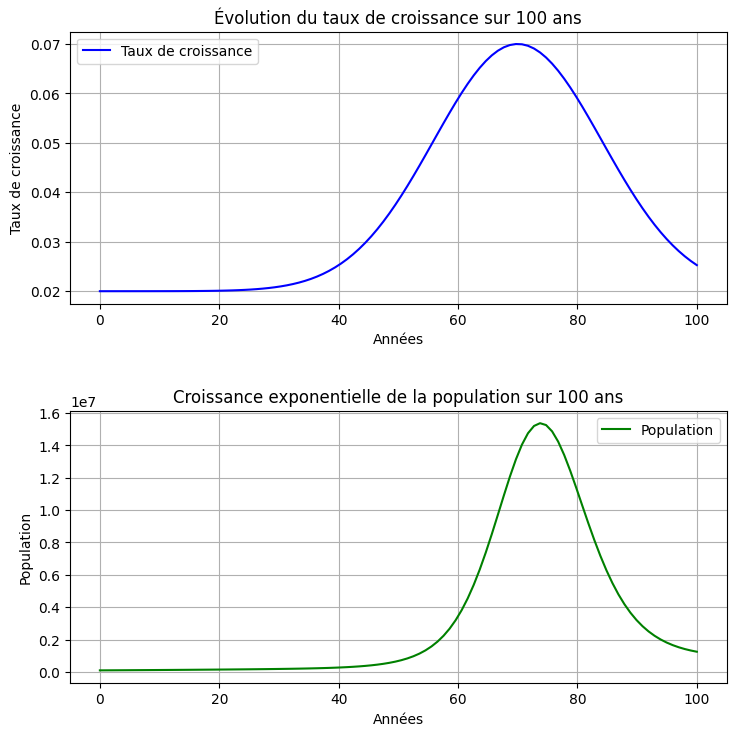

In [13]:
# Modélisation de la croissance démographique

## Paramètres
n_0 = 100000  # Population initiale
A = 0.05  # écart maximale (~7% sera lee taux de croissance au milieu)
min_val = 0.02 # le taux de croissance minimal. Le taux de croissance maximal sera min_val + A
T_0 = 70  # L'année où la fonction atteint son maximum (au milieu de la période)
b = 20  # Largeur de la cloche (contrôle la durée de la phase de croissance)
### On suppose que dt est de l'ordre de l'année

## Simulation sur 100 ans
T = np.linspace(0, 100, 100)  # Temps simulé sur 100 ans

## Fonction du taux de croissance :
r = min_val + A*np.exp(-1 * ((T - T_0)/b)**2)

## Évolution de la population :
N = n_0 * np.exp(r * T)

# Création d'une nouvelle figure avec des sous-graphiques
fig, axs = plt.subplots(2, figsize=(8, 8))  # Ajustement de la taille de la figure

# Tracé du taux de croissance
axs[0].plot(T, r, label="Taux de croissance", color='blue')
axs[0].set_title(f'Évolution du taux de croissance sur {round(np.max(T))} ans')
axs[0].set_xlabel('Années')
axs[0].set_ylabel('Taux de croissance')
axs[0].grid(True)
axs[0].legend()

# Tracé de la population
axs[1].plot(T, N, label="Population", color='green')
axs[1].set_title(f'Croissance exponentielle de la population sur {round(np.max(T))} ans')
axs[1].set_xlabel('Années')
axs[1].set_ylabel('Population')
axs[1].grid(True)
axs[1].legend()

# Ajustement de l'espace entre les sous-graphiques
fig.tight_layout(pad=3.0)

# Affichage du graphique
plt.show()

### Modèle logistique ou modèle de Verhust

L'équation différentielle du modèle logistique de Verhulst se présente comme suit : $$ \frac{dN}{dt} = r*N(t)*(1 - \frac{K}{N}) $$
où :

- $N(t)$ est la taille de la population à l'instant $𝑡$.
- $r$ est le taux de croissance intrinsèque.
- $K$ est la capacité de charge.
Résolution analytique :
La solution de cette équation différentielle logistique est :
$$ N(t) = \frac{K}{1 + (\frac{K - N_0}{N_0}) e^{-rt}} $$
 
où :
- $𝑁_0$ est la taille initiale de la population (la valeur de 𝑁 au temps 𝑡 = 0).

#### Avec le taux de croissance constante

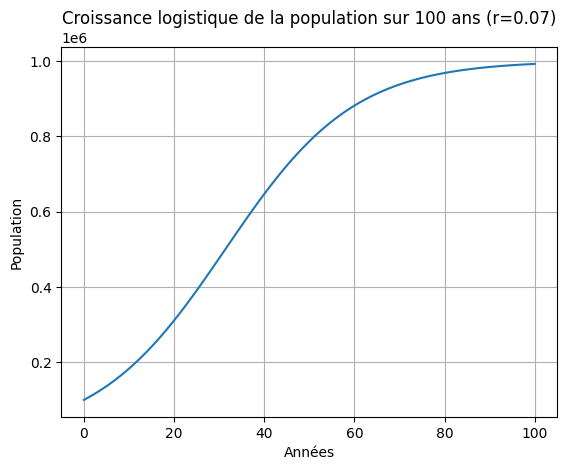

In [4]:
# Modelisation
## Parameters
N_0 = 100000 # initial population
K = 1000000 # la capacité de charge de l'environnement
r = 0.07 #growth rate, pour un pays africain ou d'asie du sud est(ou ouest)
### On suppose que dt est de l'ordre de le l'année
## On suppose que la simulation se passe sur un  100 ans.
T = np.linspace(0, 100, 100)

## L'evolution de la population :
N = K/(1 + ((K - N_0)/N_0)*np.exp(-r*T))

# Création d'une nouvelle figure
plt.figure()

# Tracé des résultats
plt.plot(T, N, label='Population')
plt.xlabel('Années')
plt.ylabel('Population')
plt.title(f'Croissance logistique de la population sur {round(np.max(T))} ans (r={r})')
plt.grid(True)  # Ajout de la grille
plt.show()

#### Avec taux de croissance variable (Sigmoïde)

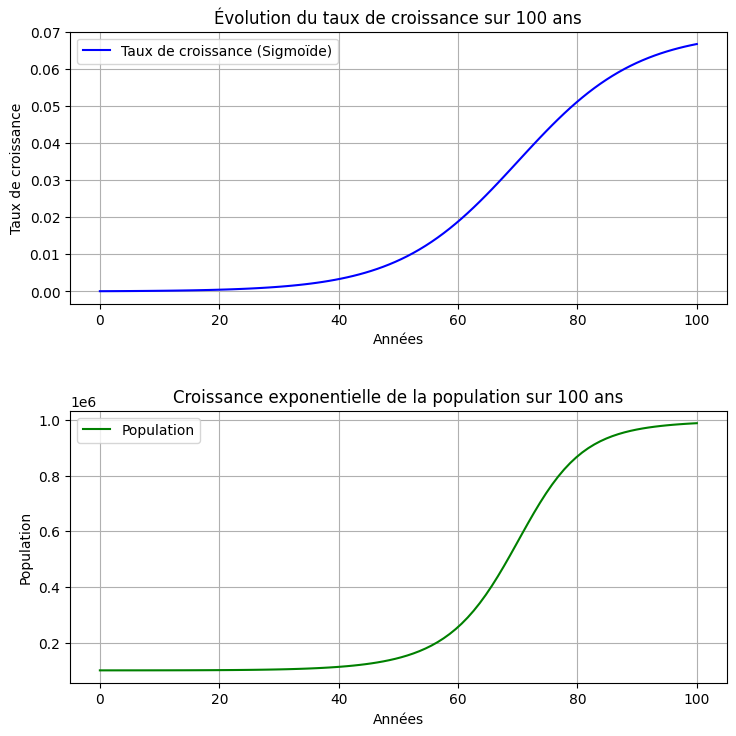

In [6]:
# Modélisation de la croissance démographique

## Paramètres
N_0 = 100000  # Population initiale
r_max = 0.07  # Taux de croissance maximal, adapté pour un pays africain ou d'Asie du Sud-Est (ou Ouest)
K = 1000000 # la capacité de charge de l'environnement
T_0 = 70  # L'année où la croissance est la plus rapide
a = 0.1  # Vitesse à laquelle la croissance s'accélère
### On suppose que dt est de l'ordre de l'année

## Simulation sur 100 ans
T = np.linspace(0, 100, 100)  # Temps simulé sur 100 ans

## Fonction du taux de croissance : fonction Sigmoïde
r = r_max / (1 + np.exp(-a * (T - T_0)))

## Évolution de la population :
N = K/(1 + ((K - N_0)/N_0)*np.exp(-r*T))

# Création d'une nouvelle figure avec des sous-graphiques
fig, axs = plt.subplots(2, figsize=(8, 8))  # Ajustement de la taille de la figure

# Tracé du taux de croissance
axs[0].plot(T, r, label="Taux de croissance (Sigmoïde)", color='blue')
axs[0].set_title(f'Évolution du taux de croissance sur {round(np.max(T))} ans')
axs[0].set_xlabel('Années')
axs[0].set_ylabel('Taux de croissance')
axs[0].grid(True)
axs[0].legend()

# Tracé de la population
axs[1].plot(T, N, label="Population", color='green')
axs[1].set_title(f'Croissance exponentielle de la population sur {round(np.max(T))} ans')
axs[1].set_xlabel('Années')
axs[1].set_ylabel('Population')
axs[1].grid(True)
axs[1].legend()

# Ajustement de l'espace entre les sous-graphiques
fig.tight_layout(pad=3.0)

# Affichage du graphique
plt.show()

### Avec taux de croissance variable( fonction gaussienne)

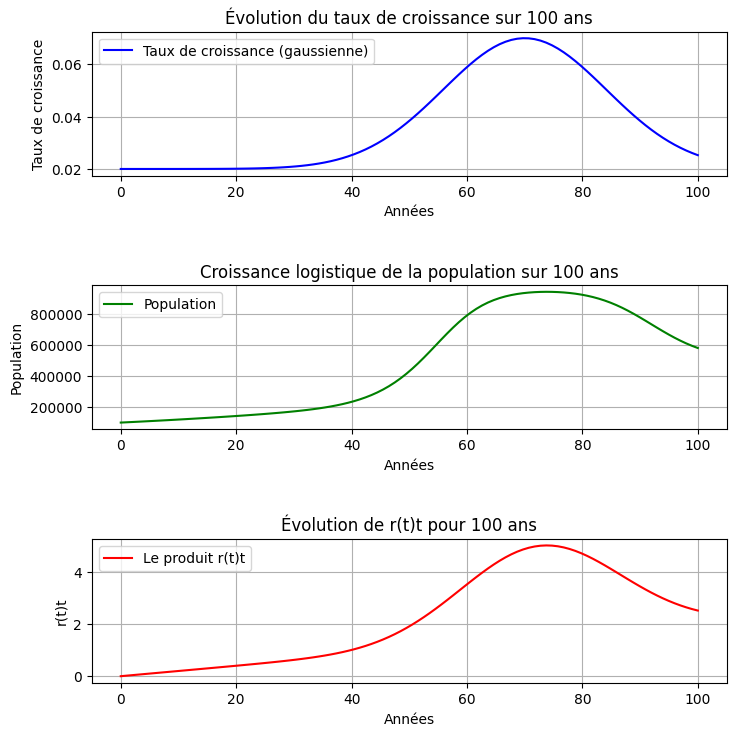

In [12]:
# Modélisation de la croissance démographique

## Paramètres
N_0 = 100000  # Population initiale
A = 0.05  # écart maximale (~7% sera lee taux de croissance au milieu)
min_val = 0.02 # le taux de croissance minimal. Le taux de croissance maximal sera min_val + A
K = 1000000 # la capacité de charge de l'environnement
T_0 = 70  # L'année où la fonction atteint son maximum (au milieu de la période)
b = 20  # Largeur de la cloche (contrôle la durée de la phase de croissance)
### On suppose que dt est de l'ordre de l'année

## Simulation sur 100 ans
T = np.linspace(0, 100, 100)  # Temps simulé sur 100 ans

## Fonction du taux de croissance :
r = min_val + A*np.exp(-1 * ((T - T_0)/b)**2)

## Évolution de la population :
N = K/(1 + ((K - N_0)/N_0)*np.exp(-r*T))

## Le produit rt:
r_t = r*T

# Création d'une nouvelle figure avec des sous-graphiques
fig, axs = plt.subplots(3, figsize=(8, 8))  # Ajustement de la taille de la figure

# Tracé du taux de croissance
axs[0].plot(T, r, label="Taux de croissance (gaussienne)", color='blue')
axs[0].set_title(f'Évolution du taux de croissance sur {round(np.max(T))} ans')
axs[0].set_xlabel('Années')
axs[0].set_ylabel('Taux de croissance')
axs[0].grid(True)
axs[0].legend()

# Tracé de la population
axs[1].plot(T, N, label="Population", color='green')
axs[1].set_title(f'Croissance logistique de la population sur {round(np.max(T))} ans')
axs[1].set_xlabel('Années')
axs[1].set_ylabel('Population')
axs[1].grid(True)
axs[1].legend()

# Tracé du taux de croissance
axs[2].plot(T, r_t, label="Le produit r(t)t", color='red')
axs[2].set_title(f'Évolution de r(t)t pour {round(np.max(T))} ans')
axs[2].set_xlabel('Années')
axs[2].set_ylabel('r(t)t')
axs[2].grid(True)
axs[2].legend()

# Ajustement de l'espace entre les sous-graphiques
fig.tight_layout(pad=3.0)

# Affichage du graphique
plt.show()

#### Commentaires
Dans les modèles **exponentiel** et **logistique** avec un taux de croissance variable, simulé par une fonction gaussienne, on observe une décroissance de la population à partir d'un certain temps \( T_0 \), lorsque le taux de croissance commence à diminuer. Toutefois, la décroissance est beaucoup plus lente dans le modèle logistique que dans le modèle exponentiel.

Dans le modèle exponentiel, la population dépend directement du taux de croissance \( r \). Comme \( r \) diminue avec la fonction gaussienne, la population suit immédiatement cette décroissance sans mécanisme de régulation, ce qui conduit à une diminution rapide et continue. 

Dans le modèle logistique, en revanche, la capacité de charge \( K \) introduit un mécanisme de régulation. Ce terme \( K \) empêche la population de croître trop rapidement lorsque \( r \) est en phase ascendante, mais il freine aussi la décroissance lorsque \( r \) diminue. En quelque sorte, \( K \) agit comme un amortisseur, en ralentissant les fluctuations, que ce soit dans la phase de croissance ou de décroissance. 

Même lorsque \( r \) diminue dans le modèle logistique, la population tend à rester régulée autour de \( K \), ce qui ralentit la décroissance comparée à celle du modèle exponentiel. Ainsi, le modèle logistique atténue l'impact des variations du taux de croissance, contrairement au modèle exponentiel où la population est bien plus directement affectée par les fluctuations de \( r \).

### Modèle logistique avec effet Allee

#### Théorie du modèle avec effet Allee

L'**effet Allee** modélise un phénomène dans lequel une population doit atteindre un certain **seuil critique**, appelé **seuil d'Allee**, pour pouvoir croître. Si la population est en dessous de ce seuil, elle tend à décliner jusqu'à l'extinction. Si elle dépasse ce seuil, elle croît jusqu'à atteindre une **capacité de charge** \(K\), c'est-à-dire la population maximale que l'environnement peut supporter.

#### L'équation différentielle du modèle logistique avec effet Allee

L'équation de base du modèle logistique est : 
$$
\frac{dN}{dt} = r N \left(1 - \frac{N}{K}\right)
$$

où :
- \(N(t)\) est la taille de la population à l'instant \(t\),
- \(r\) est le taux de croissance intrinsèque,
- \(K\) est la capacité de charge de l'environnement.

Dans le modèle avec effet Allee, on introduit un **seuil critique** \(N_c\), et l'équation devient :

$$
\frac{dN}{dt} = r N \left(1 - \frac{N}{K}\right) \left( \frac{N}{N_c} - 1 \right)
$$

###" Dynamique de la population :
- Si \(N < N_c\), la population décroît.
- Si \(N > N_c\), la population croît vers \(K\).

#### Résolution de l'équation :
Cette équation n'a pas de solution analytique simple. Cependant, elle peut être résolue numériquement à l'aide de méthodes telles que **Euler** ou **Runge-Kutta** pour simuler l'évolution de la population au cours du temps.


#### Le seuil d'Allee et les caractéristiques biologiques

Le **seuil d'Allee** est principalement déterminé par des **facteurs intrinsèques à l'espèce**, tels que :

- **Le taux de reproduction** : Certaines espèces, comme les lapins ou les rats, ont un taux de fécondité très élevé. Même une petite population peut croître rapidement. En revanche, pour des espèces à long temps de gestation ou avec un comportement reproductif plus rare (comme les éléphants ou les grands carnivores), il faut un groupe suffisamment grand pour que la reproduction soit efficace.

- **Les comportements sociaux** : Certaines espèces nécessitent un certain nombre d'individus pour des activités collectives, comme la chasse ou la protection contre les prédateurs. Par exemple, les loups ou les lions, qui chassent en meute, ont besoin d'un nombre minimum d'individus pour chasser efficacement.

- **Le risque de consanguinité** : Si une population est trop petite, les chances de reproduction entre individus proches génétiquement augmentent, ce qui peut réduire la diversité génétique et rendre la population plus vulnérable aux maladies ou aux changements environnementaux.


#### Seuil d'Allee et conditions environnementales

Il est possible que le **seuil d'Allee** puisse varier indirectement en raison de **changements environnementaux** qui influencent le comportement ou la survie des espèces. Par exemple, si des conditions environnementales drastiques changent (réduction des prédateurs ou augmentation de la nourriture disponible), une population initialement trop petite pour croître pourrait avoir de meilleures chances de survie. Toutefois, ces changements environnementaux affectent davantage la **capacité de charge** \(K\) que le seuil d'Allee, qui reste principalement lié aux comportements reproductifs et sociaux.


### Modélisation avec le seuil d'Allee constant

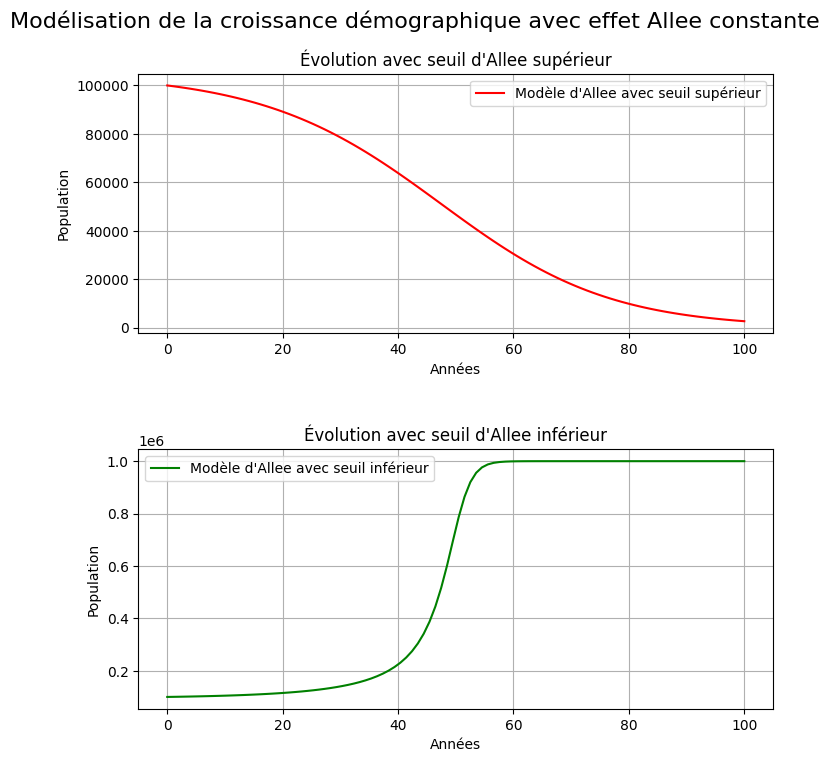

In [20]:
# Paramètres
N_0 = 100000  # Population initiale
N_c_inf = 95000  # Seuil d'Allee inférieur
N_c_sup = 105000  # Seuil d'Allee supérieur
K = 1000000  # Capacité de charge de l'environnement
T = np.linspace(0, 100, 100)  # Temps simulé sur 100 ans
r = 0.07  # Taux de croissance

# Modèle ODE pour la simulation
def model(y, t, r, N_c, K):
    dydt = r * y * (1 - y / K) * (y / N_c - 1)
    return dydt

# Résolutions de l'équation avec odeint
y_sup = odeint(model, N_0, T, args=(r, N_c_sup, K))
y_inf = odeint(model, N_0, T, args=(r, N_c_inf, K))

# Création d'une figure avec des sous-graphiques
fig, axs = plt.subplots(2, figsize=(8, 8))

# Tracé avec seuil supérieur
axs[0].plot(T, y_sup, label="Modèle d'Allee avec seuil supérieur", color='red')
axs[0].set_title(f"Évolution avec seuil d'Allee supérieur")
axs[0].set_xlabel('Années')
axs[0].set_ylabel('Population')
axs[0].grid(True)
axs[0].legend()

# Tracé avec seuil inférieur
axs[1].plot(T, y_inf, label="Modèle d'Allee avec seuil inférieur", color='green')
axs[1].set_title(f"Évolution avec seuil d'Allee inférieur")
axs[1].set_xlabel('Années')
axs[1].set_ylabel('Population')
axs[1].grid(True)
axs[1].legend()

# Ajouter un titre global à l'ensemble de la figure
fig.suptitle('Modélisation de la croissance démographique avec effet Allee constante', fontsize=16)

# Ajustement de l'espace entre les sous-graphes
fig.tight_layout(pad=3.0)

# Ajustement du titre global pour ne pas le superposer aux sous-graphiques
fig.subplots_adjust(top=0.9)

# Affichage du graphique
plt.show()

### Modélisation avec le seuil d'Allee variable

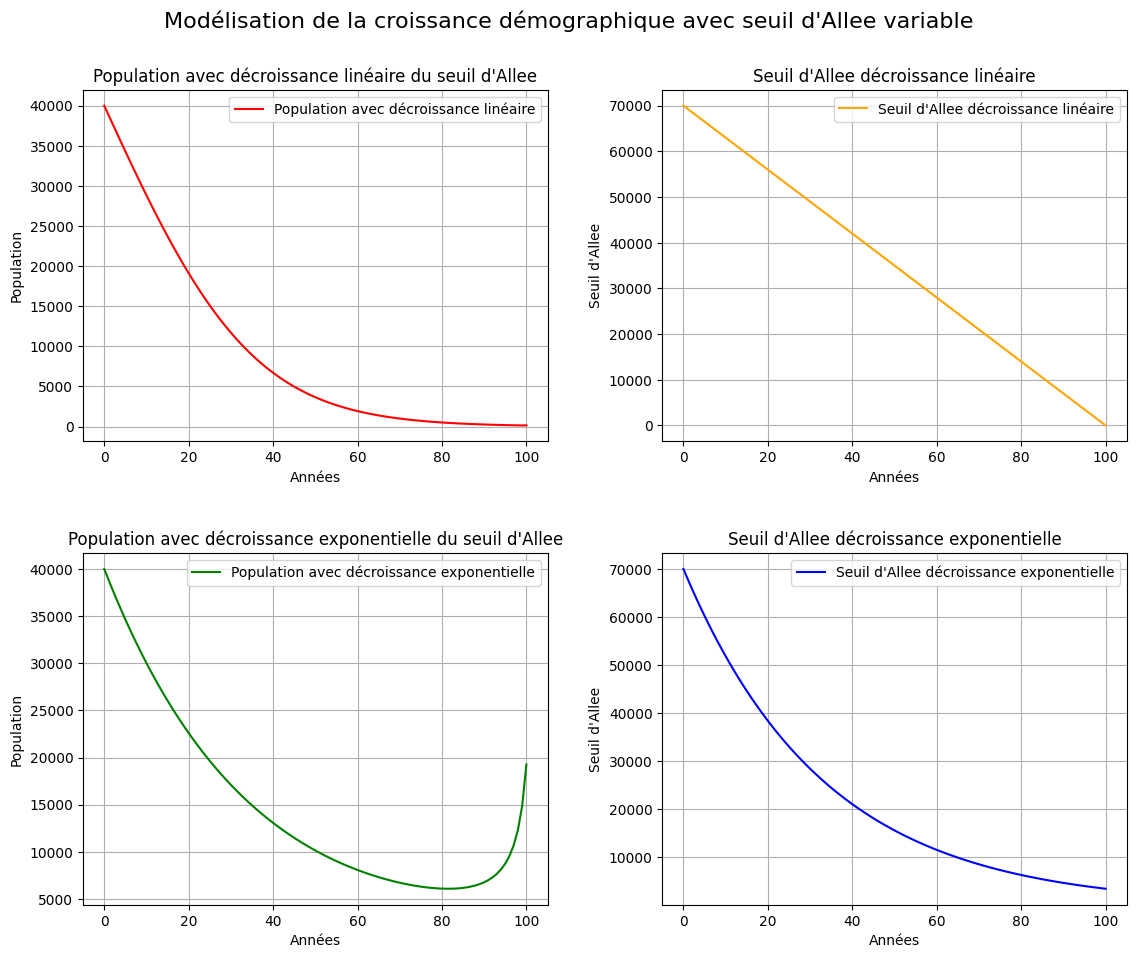

In [59]:
# Paramètres
N_0 = 40000  # Population initiale
N_c_0 = 70000  # Seuil d'Allee initial
beta = 700  # Paramètre de décroissance linéaire
alpha = 0.03  # Paramètre de décroissance exponentielle
K = 1000000  # Capacité de charge de l'environnement
T = np.linspace(0, 100, 100)  # Temps simulé sur 100 ans
r = 0.07  # Taux de croissance

# Simulation du seuil d'Allee avec décroissance linéaire
def linear_decrease(t, N_c_0, beta):
    lin = N_c_0 - beta * t
    return np.maximum(lin, 1)  # Assure que le seuil ne devienne pas négatif

# Simulation du seuil d'Allee avec décroissance exponentielle
def exp_decrease(t, N_c_0, alpha):
    exp = N_c_0 * np.exp(-alpha * t)
    return np.maximum(1,exp)

# Modèle ODE avec décroissance linéaire du seuil d'Allee
def model_d_lin(y, t, r, N_c_0, beta, K):
    N_c = linear_decrease(t, N_c_0, beta)
    dydt = r * y * (1 - y / K) * (y / N_c - 1)
    return dydt

# Modèle ODE avec décroissance exponentielle du seuil d'Allee
def model_d_exp(y, t, r, N_c_0, alpha, K):
    N_c = exp_decrease(t, N_c_0, alpha)
    dydt = r * y * (1 - y / K) * (y / N_c - 1)
    return dydt

# Résolution de l'ODE avec odeint pour décroissance linéaire et exponentielle
y_d_lin = odeint(model_d_lin, N_0, T, args=(r, N_c_0, beta, K))
y_d_exp = odeint(model_d_exp, N_0, T, args=(r, N_c_0, alpha, K))

# Calcul des seuils d'Allee pour chaque cas
Nc_lin_values = np.array([linear_decrease(t, N_c_0, beta) for t in T])
Nc_exp_values = exp_decrease(T, N_c_0, alpha)

# Création d'une figure avec 4 sous-graphiques (2x2)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Tracé de la population avec décroissance linéaire du seuil d'Allee
axs[0, 0].plot(T, y_d_lin, label="Population avec décroissance linéaire", color='red')
axs[0, 0].set_xlabel('Années')
axs[0, 0].set_ylabel('Population')
axs[0, 0].set_title('Population avec décroissance linéaire du seuil d\'Allee')
axs[0, 0].grid(True)
axs[0, 0].legend()

# Tracé du seuil d'Allee avec décroissance linéaire
axs[0, 1].plot(T, Nc_lin_values, label="Seuil d'Allee décroissance linéaire", color='orange')
axs[0, 1].set_xlabel('Années')
axs[0, 1].set_ylabel('Seuil d\'Allee')
axs[0, 1].set_title('Seuil d\'Allee décroissance linéaire')
axs[0, 1].grid(True)
axs[0, 1].legend()

# Tracé de la population avec décroissance exponentielle du seuil d'Allee
axs[1, 0].plot(T, y_d_exp, label="Population avec décroissance exponentielle", color='green')
axs[1, 0].set_xlabel('Années')
axs[1, 0].set_ylabel('Population')
axs[1, 0].set_title('Population avec décroissance exponentielle du seuil d\'Allee')
axs[1, 0].grid(True)
axs[1, 0].legend()

# Tracé du seuil d'Allee avec décroissance exponentielle
axs[1, 1].plot(T, Nc_exp_values, label="Seuil d'Allee décroissance exponentielle", color='blue')
axs[1, 1].set_xlabel('Années')
axs[1, 1].set_ylabel('Seuil d\'Allee')
axs[1, 1].set_title('Seuil d\'Allee décroissance exponentielle')
axs[1, 1].grid(True)
axs[1, 1].legend()

# Ajouter un titre global à l'ensemble de la figure
fig.suptitle('Modélisation de la croissance démographique avec seuil d\'Allee variable', fontsize=16)

# Ajustement de l'espace entre les sous-graphiques
fig.tight_layout(pad=3.0)

# Ajustement du titre global pour ne pas le superposer aux sous-graphiques
fig.subplots_adjust(top=0.9)

# Affichage du graphique
plt.show()


### Explication théorique : Différences entre décroissance linéaire et exponentielle

#### 1. Décroissance linéaire : Un phénomène brusque

##### Fonction linéaire

La décroissance linéaire est décrite par une fonction du type :

$$ N_c(t) = N_c0 - \beta t $$

où :
- $N_c(t)$ est le seuil d'Allee à l'instant $t$,
- $N_c0$ est le seuil initial,
- $\beta$ est le taux constant de décroissance,
- $t$ est le temps.

##### Comportement mathématique

Dans une décroissance linéaire, le seuil d'Allee $N_c(t)$ décroît à un **taux constant**. Cela signifie que, pour chaque unité de temps, la diminution de $N_c(t)$ est toujours la même. Par exemple, si $\beta = 500$, alors à chaque unité de temps, le seuil $N_c$ diminue de 500.

###### Exemple :
Si $N_c0 = 50000$ et $\beta = 500$, alors après 10 ans, le seuil d'Allee sera :

$$ N_c(10) = 50000 - 500 \times 10 = 45000 $$

Après 20 ans, le seuil sera :

$$ N_c(20) = 50000 - 500 \times 20 = 40000 $$

Ce type de décroissance est rapide et directe, ce qui peut parfois entraîner des **changements brusques** lorsque le seuil devient suffisamment bas pour permettre à la population de dépasser le seuil d'Allee.

##### Comportement brusque autour de certaines valeurs de $\beta$

Quand tu as observé qu'à $\beta = 700$ le comportement est similaire à celui à $\beta = 500$, cela est dû au fait que la décroissance linéaire reste régulière et le seuil descend de manière prédictible. Cependant, quand tu changes $\beta$ à 701, cela peut entraîner un **point de basculement** où le seuil $N_c(t)$ devient suffisamment bas pour permettre à la population de recroître brusquement.

Cela peut être causé par une interaction délicate entre le seuil $N_c(t)$ et la dynamique de la population, qui est modélisée par une fonction de type logistique. Une petite variation de $\beta$ peut donc entraîner un changement soudain dans le comportement de la population.

##### Problème avec la décroissance linéaire

Le problème de la décroissance linéaire est que le seuil diminue de manière constante, et si la population n’a pas le temps de réagir au changement du seuil, elle peut se retrouver bloquée en dessous de ce seuil pour longtemps. Cela explique pourquoi, même avec une petite variation de $\beta$, tu observes un comportement totalement différent.

#### 2. Décroissance exponentielle : Un phénomène plus doux

##### Fonction exponentielle

La décroissance exponentielle est décrite par une fonction du type :

$$ N_c(t) = N_c0 \times e^{-\alpha t} $$

où :
- $N_c(t)$ est le seuil d'Allee à l'instant $t$,
- $N_c0$ est le seuil initial,
- $\alpha$ est le taux de décroissance exponentielle,
- $t$ est le temps.

##### Comportement mathématique

Contrairement à la décroissance linéaire, la décroissance exponentielle ralentit avec le temps. Cela signifie que, au début, la décroissance est rapide, mais au fil du temps, le seuil $N_c(t)$ diminue de moins en moins.

###### Exemple :
Si $N_c0 = 50000$ et $\alpha = 0.02$, alors après 10 ans, le seuil d'Allee sera :

$$ N_c(10) = 50000 \times e^{-0.02 \times 10} \approx 40932 $$

Après 20 ans, le seuil sera :

$$ N_c(20) = 50000 \times e^{-0.02 \times 20} \approx 33516 $$

Et après 50 ans :

$$ N_c(50) = 50000 \times e^{-0.02 \times 50} \approx 22119 $$

On voit ici que la décroissance exponentielle **ralentit** avec le temps, ce qui permet à la population de réagir plus progressivement aux changements du seuil. Cela évite des comportements brusques ou soudains et explique pourquoi cette approche est plus "douce".

##### Avantages de la décroissance exponentielle

- La décroissance exponentielle modifie le seuil plus progressivement, laissant ainsi le temps à la population de réagir.
- Contrairement à la décroissance linéaire, elle ne force pas un changement brutal, mais crée une transition plus naturelle.
- Les interactions avec la dynamique de la population deviennent plus prévisibles et contrôlées avec ce type de décroissance.

### Modèle de métapopulation (Levins)

L'équation différentielle du modèle logistique de Verhulst se présente comme suit : $$ \frac{dN}{dt} = cN(1 - N) - eN $$
où :

- $N$ est la fraction d'habitats occupés à l'instant $𝑡$.
- $c$ est le taux de colonisation.
- $e$ est le taux d'extinction.

In [3]:
# Fonction du modèle de Levins
def levins_model(x, t, c, e):
    dxdt = c * x * (1 - x) - e * x
    return dxdt

# Fonction pour tracer le modèle et sauvegarder le graphe
def plot_model(x_0, c, e):
    T_span = (0, 100)
    T = np.linspace(*T_span, 1000)
    sol = odeint(levins_model, x_0/100, T, args=(c, e))  # Normalisation de x_0
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(T, sol, label='Fraction de la population')
    ax.set_xlabel('Années')
    ax.set_ylabel('Proportion')
    ax.set_title(f'Modèle de Levins sur {round(np.max(T))} ans')
    ax.legend()
    ax.grid(True)
    
    plt.show()
    
    # Fonction de sauvegarde
    def save_graph(b):
        fig.savefig('modele_levins.png')
        print("Graphique enregistré sous 'modele_levins.png'")
    
    # Création d'un bouton avec ipywidgets
    save_button = Button(description="Save Graph")
    save_button.on_click(save_graph)
    
    # Affichage du bouton dans la cellule
    display(save_button)

# Curseurs interactifs et affichage
interactive_plot = interactive(plot_model,
                               x_0=widgets.IntSlider(min=10, max=100, step=5, value=50, description='Fraction initiale (%)'),
                               c=widgets.FloatSlider(min=0.1, max=2.0, step=0.1, value=1.0, description='Taux de colonisation'),
                               e=widgets.FloatSlider(min=0.01, max=0.1, step=0.01, value=0.02, description='Taux d\'extinction'))

# Affichage du plot interactif avec les widgets
display(VBox([interactive_plot]))